In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
x= np.linspace(0,60,501)
y = np.sin(x)

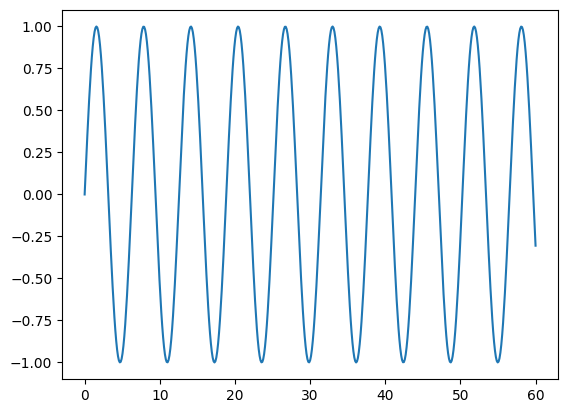

In [5]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data =y,index=x,columns=['sine'])

In [8]:
df

,sine
0.00,0.000000
0.12,0.119712
0.24,0.237703
0.36,0.352274
0.48,0.461779
...,...
59.52,0.169439
59.64,0.050239
59.76,-0.069683
59.88,-0.188603


In [9]:
test_percent = 0.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_ind = int(len(df)- test_point)

In [12]:
train = df.iloc[:test_ind]

In [13]:
test = df.iloc[test_ind:]

In [14]:
train

,sine
0.00,0.000000
0.12,0.119712
0.24,0.237703
0.36,0.352274
0.48,0.461779
...,...
53.52,-0.112685
53.64,-0.230824
53.76,-0.345644
53.88,-0.455492


In [15]:
test

,sine
54.12,-0.654049
54.24,-0.739902
54.36,-0.815113
54.48,-0.878601
54.60,-0.929452
54.72,-0.966935
54.84,-0.990511
54.96,-0.999840
55.08,-0.994789
55.20,-0.975431


In [16]:
## scalling
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)

In [20]:
scaled_test = scaler.transform(test)

In [21]:
# time series generator class

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
#help(TimeseriesGenerator)

In [41]:
length = 25 
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=batch_size)

In [42]:
len(scaled_train)

451

In [43]:
len(generator)

426

In [44]:
## checking the first element at first inndex
# using tupple unpacking since it returns X and y that should be predicted off of the x

In [45]:
X,y = generator[0]

In [46]:
X

array([[[0.50000154],
        [0.55985787],
        [0.61885331],
        [0.67613933],
        [0.73089201],
        [0.78232386],
        [0.82969514],
        [0.87232453],
        [0.9095989 ],
        [0.94098214],
        [0.96602287],
        [0.98436095],
        [0.99573262],
        [0.99997432],
        [0.99702505],
        [0.98692723],
        [0.96982608],
        [0.94596758],
        [0.91569487],
        [0.87944335],
        [0.83773443],
        [0.79116798],
        [0.74041377],
        [0.68620177],
        [0.62931171]]])

In [47]:
y

array([[0.57056181]])

In [49]:
#scaled_train

In [50]:
length = 60 
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=batch_size)

In [51]:
# model creation

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [53]:
n_features = 1

In [55]:
model = Sequential()

model.add(SimpleRNN(60,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 60)                3720      
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 3,781
Trainable params: 3,781
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit_generator(generator,epochs=6)

Epoch 1/6
391/391 [==============================] - 6s 12ms/step - loss: 0.0036
Epoch 2/6
391/391 [==============================] - 5s 12ms/step - loss: 0.0010
Epoch 3/6
391/391 [==============================] - 5s 13ms/step - loss: 1.9220e-04
Epoch 4/6
391/391 [==============================] - 5s 12ms/step - loss: 1.6445e-05
Epoch 5/6
391/391 [==============================] - 5s 12ms/step - loss: 1.5508e-06
Epoch 6/6
391/391 [==============================] - 5s 13ms/step - loss: 4.1598e-05


In [58]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

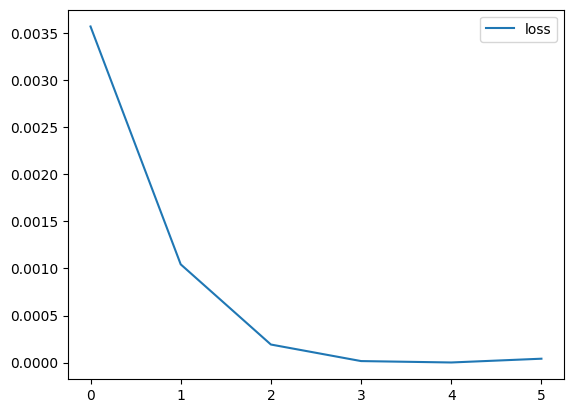

In [59]:
loss.plot()

In [60]:
# Evaluating on the test data

In [62]:
first_eval_batch = scaled_train[-length:] 

In [63]:
# reshaping
first_eval_batch=first_eval_batch.reshape(1,length,n_features)

In [64]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 337ms/step


array([[0.17221954]], dtype=float32)

In [65]:
scaled_test[0]

array([0.17297573])

In [69]:
# current batch
#predicted_value = [[[84]]]
#np.append(current_batch[:,1:,:],[[[84]]]axis=1)

In [71]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


In [77]:
#est_pred

In [73]:
# inversing the scalled pred

In [74]:
true_pred = scaler.inverse_transform(test_pred)

In [76]:
#true_pred

In [78]:
test['predictions'] = true_pred

<AxesSubplot:>

<Figure size 1200x400 with 0 Axes>

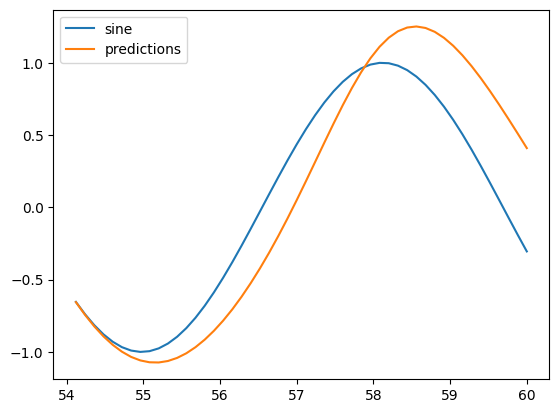

In [79]:
plt.figure(figsize=(12,4))
test.plot()

In [81]:
## Using an lstm and early stopping to improve the predictions

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [84]:
# validation generator

In [87]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [88]:
model = Sequential()

model.add(LSTM(60,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [89]:
model.fit_generator(generator,epochs=24,
                   validation_data=validation_generator,
                   callbacks=early_stop)

Epoch 1/24
402/402 [==============================] - 12s 22ms/step - loss: 0.0114 - val_loss: 1.5564e-06
Epoch 2/24
402/402 [==============================] - 7s 18ms/step - loss: 4.6356e-05 - val_loss: 7.6560e-05
Epoch 3/24
402/402 [==============================] - 7s 18ms/step - loss: 6.8094e-05 - val_loss: 6.7229e-04


In [90]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


<AxesSubplot:>

<Figure size 1200x400 with 0 Axes>

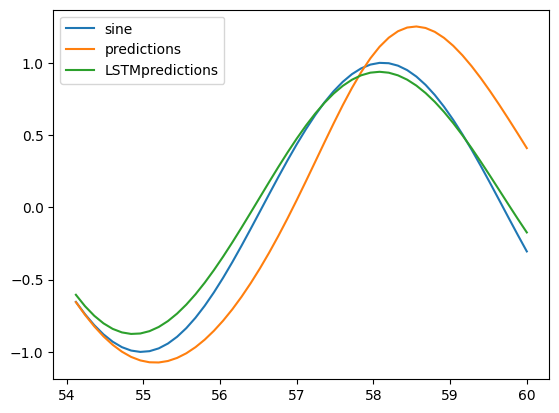

In [91]:
true_pred = scaler.inverse_transform(test_pred)
test['LSTMpredictions'] = true_pred
plt.figure(figsize=(12,4))
test.plot()

In [92]:
# Forecasting into the future

In [93]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [94]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                               length=length,batch_size=batch_size)

In [95]:
model = Sequential()

model.add(LSTM(60,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [96]:
model.fit_generator(generator,epochs=24,
                   validation_data=validation_generator,
                   callbacks=early_stop)

Epoch 1/24
452/452 [==============================] - 12s 22ms/step - loss: 0.0149 - val_loss: 2.4034e-04
Epoch 2/24
452/452 [==============================] - 9s 19ms/step - loss: 1.4129e-04 - val_loss: 0.0018
Epoch 3/24
452/452 [==============================] - 9s 21ms/step - loss: 6.3088e-04 - val_loss: 7.4393e-06
Epoch 4/24
452/452 [==============================] - 8s 19ms/step - loss: 3.8878e-05 - val_loss: 3.5872e-05
Epoch 5/24
452/452 [==============================] - 9s 21ms/step - loss: 1.5767e-04 - val_loss: 9.9797e-05


In [97]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 36ms/step


In [98]:
forecast = scaler.inverse_transform(forecast)

In [99]:
forecast_index = np.arange(60.1,62.6,step=0.1)

In [100]:
len(forecast)

25

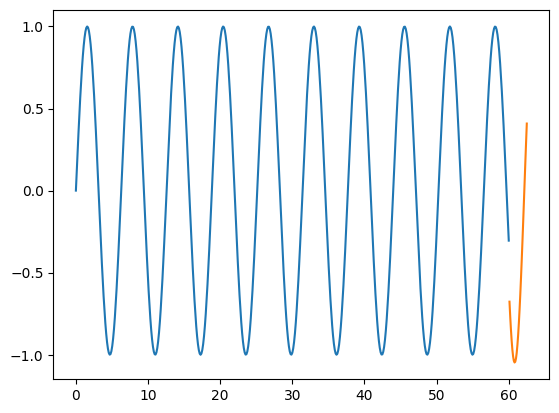

In [102]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)